<a href="https://colab.research.google.com/github/venkatadj/co-learning-lounge/blob/master/cars_vs_planes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARS VS PLANES  CLASSIFIER

#### Have you ever wondered how we can classify cars and planes using deep learning with the help of transfer learning. If yes, then you are about to find out how and implement the solution by yourselves. It is primarily a image classification problem.<br><br>


![planes vs cars Classifier](https://drive.google.com/uc?id=1oB1dERCtrcmkDyhxR03FBSEd_VsNSkc5)

<br><br>Post your doubt/feedback/discussion in our FB group unit [here](https://www.facebook.com/groups/colearninglounge/) in the appropriate section.

## Table of content:

*   Introduction
*   Problem Statement
*   Installing Dependencies
*   Importing necessary packages
*   Preprocessing Dataset
*   Create Model/Network
*   Train the model
*   Prediction Time
*   Save Model
*   Using Pretrained Model
*   Running Our Digit Recognizer


## Introduction

In this tutorial, we'll implement  planes vs cars classifier using keras. We will cover how to implement a image classification problem using transfer learning. We will first cover some basics of Image classification like reading in, processing data and encoding the labels.Then we'll cover how to use network like VGG16  using keras and then we will introduce how to train and evaluate a model. We will also cover some intermediate level  topics like saving a model and reusing a saved model.

## Problem Statement

We need to predict the labels for the images of planes and cars using deep learning with the help of transfer learning.

## Importing necessary packages
As in every python/any language we need to import the necessary libraries.The below modules are necessary for our demo

In [0]:
from keras import layers
from keras import preprocessing
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
from keras.models import  Model,model_from_json
import pandas as pd
import numpy as np
np.random.seed(1337)
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

## Preprocessing Dataset
Any machine learning or deep learning program start with dataset preparation. Dataset preparation involves cleansing the data, labeling the data, splitting the dataset into train and test  etc. Fortunately  we dont need to prepare the dataset since we are using open source dataset  [GeekforGeeks planes VS cars](https://www.geeksforgeeks.org/python-image-classification-using-keras/) dataset which contains images of planes and cars and these are also labelled for us to use. Train dataset has 400 images and test dataset has 100 images. First we need to download the dataset from geekforgeeks and arrange it in the following manner.<br><br>

![Dataset Splitting](https://drive.google.com/uc?id=1oe_u726UIZ7u1AIgg8Eyz_xntbd9Jz2A)

<br>We first extract cars_planes_dataset.tgz using "tar -zxvf cars_planes_dataset.tgz".You may be thinking why we need to do this? Its because "flow_from_directory" keras module expects the train and test dataset should be in that format only. First we need to load the images in batches using keras "ImageDataGenerator".  Here "preprocess_input" is used for loading images in batches. "flow_from_directory" method is used to load the images and apply transfomations to it like reshapping the image to (224,224,3) using color_mode='rgb' and class_mode is used to create labels for the images automatically. So, In our case we have two classes so labels of 0(cars) and 1(planes) 's will be loaded according to their images. We are also shuffling the images for better quality of training dataset.

Note: Mention the paths as per your dataset location. Mentioned train and test dataset path are only for demo purpose.

In [0]:
import os
os.system('tar -zxvf /cars_vs_planes.tgz')
os.system('ls')

def load_and_split_data(self):
    train_datagen = preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
    self.train_generator = train_datagen.flow_from_directory(directory="/content/cars_vs_planes/train",
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=25,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )
    test_datagen = preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
    self.test_generator = test_datagen.flow_from_directory(
        directory="/content/cars_vs_planes/test_sample",
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=25,
        class_mode=None,
        shuffle=true,
        seed=42
    )

## Use Pretrained Model using Transfer Learning
The next step in Deep learning is to decide on the network/model/deep learning algorthm to use. Since we are dealing with classification problem we are using [ VGG16](http://yann.lecun.com/exdb/lenet/) architecture. You can use any image classification networks like Googlenet, Resnet, Squeezenet and experiment. So, we need to use VGG16 algorithm with imagenet weights and without the last layer i.e Classification layer, "include_top" will remove the last layer, for this we are using keras.applications.VGG16 to do that. The output of VGG16 is 1000 class labels but we don't want all 1000 for our demo we need only 2 class labels. So, in order to do that we need to modify the last layer i.e FullyConnected aka Dense layer output to 2 instead of 1000. We did exactly that using the Dense layer in keras. After that we need to construct a model with Feature learning from VGG16 and classifier from newly created model. So, we are calling keras.models.Model to do exactly that. The final step is to train our classifier, inorder to do that we make all 20 feature learning layers trainable parameter to False. We only wanted to train our last layer so we set layers after 20 layers trainable parameter to True.


In [0]:
def gen_model_using_transfer_learning(self):
    base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)
    x = base_model.output
    x = layers.Flatten()(x)
    # x=layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(self.no_of_classes, activation='softmax')(x)
    self.model = Model(inputs=base_model.input, outputs=x)
    for layer in self.model.layers[:20]:
        layer.trainable = False
    for layer in self.model.layers[20:]:
        layer.trainable = True

## Train the model

So, its time for training our model. For training a model we need two things. One loss function and other optimizer. Loss function will try to calculate difference between observed and actual. Optimizer will try to optimize the loss function in a way it learns the weights faster. So, for this demo we choose "binary_crossentropy" as loss function and optimizer as "adam". We are using "binary_crossentropy" because we need to classify two objects if you want to classify more than two objects you can use "categorical_crossentropy". You can experiment with loss and optimizer to check which fits best for your algorithm. First we need to attach the loss and optimizer to our model and then using fit function we train our model using keras "fit_generator" function which we use to train our model by passing the train dataset. Here you can see two more arguments "epoch" and "batch_size". Here epoch means how many times you want to repeat your train data. For each epoch our model learns more and more about our data. You may under the assumption that if more epoch = more accurary thats true partially because there will be a saturation point after a certain epoch your model accurary doesn't change. So, epoch should be choosen wisely. Batchsize is how many input dataset items to train parallely. So, the advantage your computational power decreases and model can learn better parallely. Batch size has a limitation on the computational power. If you put more batchsize your machine may say out of memory.


In [0]:
def train_model(self):
    STEP_SIZE_TRAIN = self.train_generator.n // self.train_generator.batch_size
    self.model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    self.model.fit_generator(generator=self.train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        epochs=self.no_of_epochs)

## Save Model

We don't need to train our model everytime we wanted to test or make predictions. We can save our model once we train our model. So, we store our model in json format. We need to save our weights as well.

In [0]:
def save_model(self):
    model_json = self.model.to_json()
    with open("%s.json" % self.save_model_name, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    self.model.save_weights("%s.h5" % self.save_model_name)

## Prediction Time

So its time for inference. predict_generator will do the inference on the test dataset  So, keras model has a function predict_generator which will predict based on the training. We pass test dataset of 10000 data points and a batch size. The output of the function is a 12500*2tensor, we use argmax(axis=1) function to get max index value of 1x2 tensor. 

In [0]:
def predict_output(self):
    test_steps = self.test_generator.n // self.test_generator.batch_size
    predict_model = self.model.predict_generator(generator=self.test_generator, steps=test_steps)
    id = np.array([i + 1 for i in range(len(predict_model))])
    df = pd.DataFrame({"id": id, "label": predict_model.argmax(axis=1)})
    df.to_csv("submission_kaggle_planes_cars.csv", index=False)
    classes = ['car', 'plane']

    for row in range(0, 3):
        plt.title("label=%s" % classes[predict_model.argmax(axis=1)[row]])
        img = mpimg.imread('/content/cars_vs_planes/test_sample/' + self.test_generator.filenames[row])
        imgplot = plt.imshow(img)
        plt.show()

## Using Saved Model

Inorder to use our pretrained model and weights we need to load our model. We use "load_weights" to load the pretrained weights.

In [0]:
def load_model(self):
    print("Loading model from disk")
    # load json and create model
    json_file = open('%s.json' % self.save_model_name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    self.model = model_from_json(loaded_model_json)
    # load weights into new model
    self.model.load_weights("%s.h5" % self.save_model_name)
    print("Loaded model from disk")

## Main class to link all methods
We define a class called "planes_vs_cars" where we link all our functions and initialize our model parameters.

In [0]:
class planes_vs_cars:
    def __init__(self):
        self.no_of_epochs=10
        self.save_model_name='vgg16'
        self.no_of_classes=2
    load_and_split_data=load_and_split_data
    gen_model_using_transfer_learning=gen_model_using_transfer_learning
    train_model=train_model
    predict_output=predict_output
    save_model=save_model
    load_model=load_model

## Methods to Run our planes vs cars Recognizer

Here we define two functions "planes_vs_cars_from_scratch" and "planes_vs_cars_reuse_saved_model". we use "planes_vs_cars_from_scratch" function to train and test and "planes_vs_cars_reuse_saved_model" function to reuse the trained model and do inference on test dataset.

In [0]:
def planes_vs_cars_from_scratch():
    tflearn=planes_vs_cars()
    tflearn.load_and_split_data()
    tflearn.gen_model_using_transfer_learning()
    tflearn.train_model()
    tflearn.save_model()
    tflearn.predict_output()
    

def planes_vs_cars_reuse_saved_model():
    tflearn = planes_vs_cars()
    tflearn.load_and_split_data()
    tflearn.load_model()
    tflearn.predict_output()

## Running Our planes vs cars Recognizer

Found 400 images belonging to 2 classes.
Found 100 images belonging to 1 classes.
Epoch 1/10
16/16 [==============================] - 6s 361ms/step - loss: 1.4664 - acc: 0.8925
Epoch 2/10
16/16 [==============================] - 4s 264ms/step - loss: 0.2823 - acc: 0.9800
Epoch 3/10
16/16 [==============================] - 4s 267ms/step - loss: 0.0802 - acc: 0.9950
Epoch 4/10
16/16 [==============================] - 4s 267ms/step - loss: 0.0356 - acc: 0.9950
Epoch 5/10
16/16 [==============================] - 4s 268ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 6/10
16/16 [==============================] - 4s 268ms/step - loss: 1.1116e-07 - acc: 1.0000
Epoch 7/10
16/16 [==============================] - 4s 267ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 8/10
16/16 [==============================] - 4s 268ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 9/10
16/16 [==============================] - 4s 268ms/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 10/10
16/16 [========================

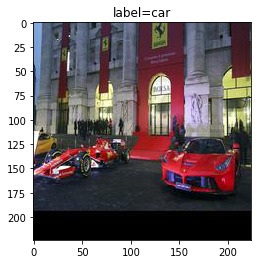

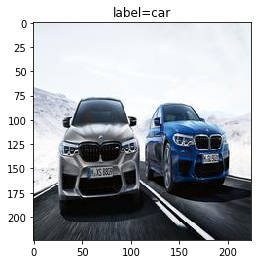

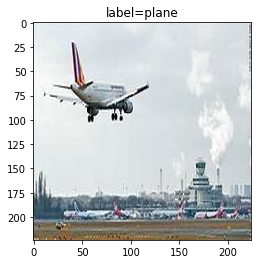

In [63]:
if __name__ == '__main__':
    planes_vs_cars_from_scratch()
#    planes_vs_cars_reuse_saved_model()

# Future scope:

*   We can use other networks like Googlenet, Resnet and try experimenting with accuracy.
*   We can also extend it for face recognition.


> This tutorial is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the tutorial. Also, we are always looking to improve the scope of this article. For anything feel free to mail us @ colearninglounge@gmail.com


> Author of this article is Venkata Durga Rao Gambali. You can follow him on [LinkedIn](https://www.linkedin.com/in/venkata-durga-rao-gambali-24606b79/), [GitHub](https://github.com/venkatadj).
